In [1]:
import NumericalModel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a NumericalModel type

model0 = NumericalModel.NumericalModel()

In [3]:
coordVec = np.loadtxt(fname= "../Testing input data/coordVec_plateWithHole.txt")
dx = coordVec[1,0] - coordVec[0,0] 
nodeVolumes = np.full(shape=coordVec.shape[0],fill_value= dx**2)

In [4]:
model0.Geometry.input_part_nodes(inputCoordinates=coordVec,inputVolumes=nodeVolumes)

In [5]:
part_nodes = model0.Geometry.part_nodes.get_part_nodes()

In [6]:
totint,totbottom,tottop =9684, 9984, 10284
ndivx,nnum =100, 10284
model0.Geometry.sets.create_set(np.arange(totint,totbottom,1,dtype=int),setName="TestSet")
model0.Geometry.sets.create_set(np.arange(totbottom,tottop,1,dtype=int),setName="TestSet2")

In [7]:
SetIDs = model0.Geometry.sets.setTable["TestSet"].get_data()
SetIDs2 = model0.Geometry.sets.setTable["TestSet2"].get_data()

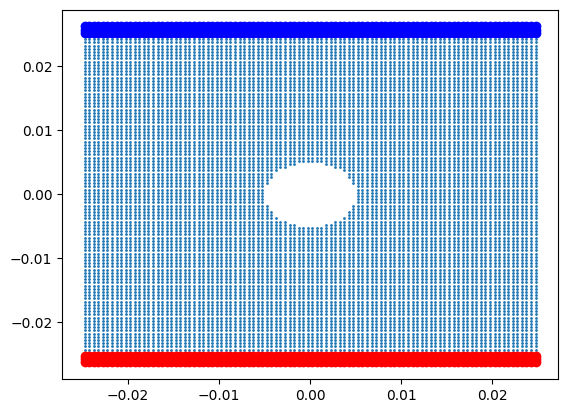

In [8]:
plt.scatter(coordVec[:,0],coordVec[:,1],s =1)
plt.scatter(coordVec[SetIDs,0],coordVec[SetIDs,1],c = "r")
plt.scatter(coordVec[SetIDs2,0],coordVec[SetIDs2,1],c = "b")

In [9]:
model0.Materials.create_material(materialName="Steel2")

In [10]:
model0.Materials.materialsTable["Steel2"].set_tensile_properties(youngMod = 70000, poisson =0.25)

In [11]:
model0.Materials.materialsTable["Steel2"].get_material_vars()

{'name': 'Steel2', 'Emod': 70000, 'poisson': 0.25}

In [12]:
model0.Discretizations.create_discretization("TestDisc")

In [13]:
model0.Discretizations.discretizationsTable["TestDisc"].set_horizon(3*dx)
model0.Discretizations.discretizationsTable["TestDisc"].generate_bonds(partNodes = model0.Geometry.part_nodes)

In [14]:
model0.Discretizations.discretizationsTable["TestDisc"].is_crack_active()

False

In [15]:
testDisc = model0.Discretizations.discretizationsTable["TestDisc"]

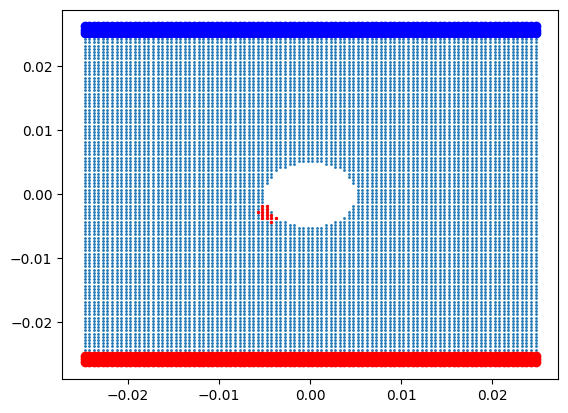

In [16]:
data = testDisc.get_node_family_coords(4395)
plt.scatter(coordVec[:,0],coordVec[:,1],s =1)
plt.scatter(coordVec[SetIDs,0],coordVec[SetIDs,1],c = "r")
plt.scatter(coordVec[SetIDs2,0],coordVec[SetIDs2,1],c = "b")
plt.scatter(data[:,0],data[:,1],s=2,c="r")